In [1]:
import matplotlib
import matplotlib.pyplot as plt
import csv
import datetime as dt
from math import sqrt, pow
import numpy as np

In [33]:
ds_thanhpho_csv = []
ds_gioitinh_csv = []
ds_tongGTDH_csv = []
ds_rating_csv = []
ds_sp_csv = []

ds_tongGTDH_nu_csv = []
ds_tongGTDH_nam_csv = []

ds_tongGTDH_DN_csv = []
ds_tongGTDH_HN_csv = []
ds_tongGTDH_HCM_csv = []

with open("data/sale_data_vn.csv", mode='r', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    
    for row in reader:
        ds_thanhpho_csv.append(row[2])
        ds_gioitinh_csv.append(row[4])
        ds_tongGTDH_csv.append(row[10])
        ds_rating_csv.append(row[14])
        ds_sp_csv.append(row[5])
        if row[4] == "Nữ":
            ds_tongGTDH_nu_csv.append(row[10])
        if row[4] == "Nam":
            ds_tongGTDH_nam_csv.append(row[10])
        if row[2] == "Đà Nẵng":
            ds_tongGTDH_DN_csv.append(row[10])
        if row[2] == "Hà Nội":
            ds_tongGTDH_HN_csv.append(row[10])
        if row[2] == "TP HCM":
            ds_tongGTDH_HCM_csv.append(row[10])

In [3]:
def thongKe(ds_TuFileCSV, ds_ThongKe):
    lst_tanSo=[]
    lst_tanSuat=[]
    for gt_thongke in ds_ThongKe:
        tanSo = 0
        for gt_csv in ds_TuFileCSV:
            if gt_thongke == gt_csv:
                tanSo +=1
        lst_tanSo.append(tanSo)
        lst_tanSuat.append(round(tanSo/len(ds_TuFileCSV)*100,2))
    return lst_tanSo, lst_tanSuat

# <font color='red'>Bài 1:</font>

### <font color='blue'>Vẽ biểu đồ cột, pie về tần số, tần suất đơn hàng theo:</font>
* Địa phương (HN, SG, ĐN)
* Giới tính

In [4]:
def ve_BieuDoCot(x1, h1, x2, h2, title):
    fig = plt.figure(figsize=(10,8))

    ax1 = fig.add_subplot(2,2,1)
    ax1.bar(x=x1, height=h1, color="red")
    ax1.title.set_text("Tần số đơn hàng")
    ax1.set_ylabel("Tần số")

    ax2 = fig.add_subplot(2,2,2)
    ax2.bar(x=x2, height=h2, color="green")
    ax2.title.set_text("Tần suất đơn hàng")
    ax2.set_ylabel("Tần suất")

    fig.suptitle(title)
    #fig.tight_layout(pad=5.0)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.7,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    plt.show()

In [5]:
def ve_BieuDoTron(sizes, labels, title_gt):
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, 
            autopct='%.1f%%',
            explode=[0.05]*len(labels), 
            textprops={'color':"w", 'weight':'bold'},
            shadow = True, 
            startangle=90, 
           )

    ax1.axis('equal') 
    ax1.legend(labels, loc=[0.9,0.5])
    plt.title(title_gt)
    plt.show()

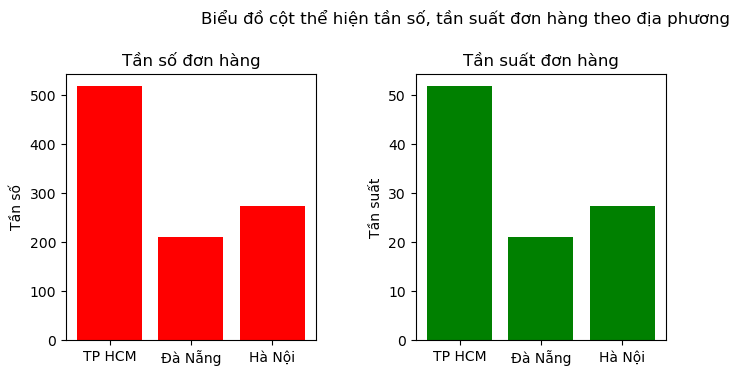

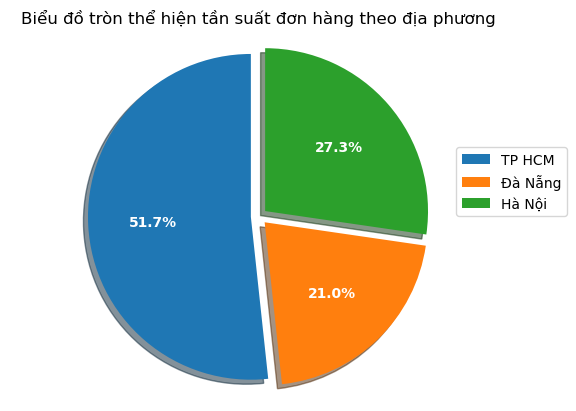

In [6]:
ds_thanhpho_thongke = list(set(ds_thanhpho_csv))
ds_tanSo_dp, ds_tanSuat_dp = thongKe(ds_thanhpho_csv, ds_thanhpho_thongke)

title_dp1 = "Biểu đồ cột thể hiện tần số, tần suất đơn hàng theo địa phương"
ve_BieuDoCot(ds_thanhpho_thongke, ds_tanSo_dp, ds_thanhpho_thongke, ds_tanSuat_dp, title_dp1)

title_dp2 = "Biểu đồ tròn thể hiện tần suất đơn hàng theo địa phương"
ve_BieuDoTron(ds_tanSuat_dp, ds_thanhpho_thongke, title_dp2)

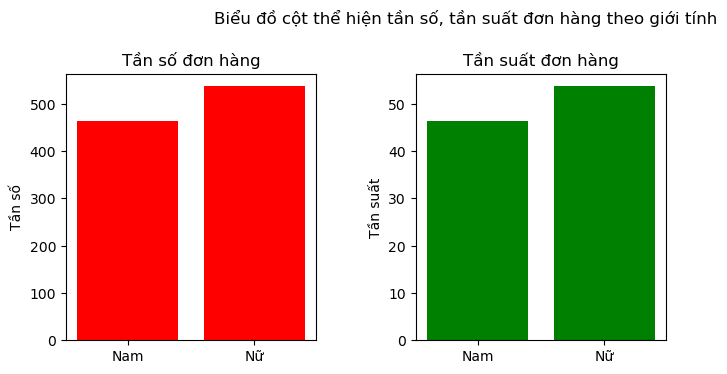

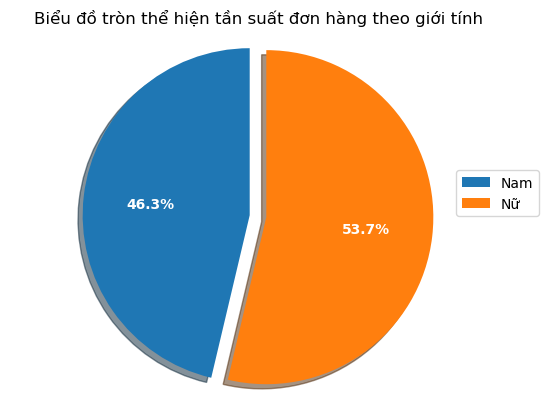

In [7]:
ds_gioitinh_thongke = list(set(ds_gioitinh_csv))
ds_tanSo_gt, ds_tanSuat_gt = thongKe(ds_gioitinh_csv, ds_gioitinh_thongke)

title_gt1 = "Biểu đồ cột thể hiện tần số, tần suất đơn hàng theo giới tính"
ve_BieuDoCot(ds_gioitinh_thongke, ds_tanSo_gt, ds_gioitinh_thongke, ds_tanSuat_gt, title_gt1)

title_gt2 = "Biểu đồ tròn thể hiện tần suất đơn hàng theo giới tính"
ve_BieuDoTron(ds_tanSuat_gt, ds_gioitinh_thongke, title_gt2)

### <font color='blue'>Vẽ biểu đồ histogram về phân bố giá trị đơn hàng, rating</font>
* Phân bố chung
* Theo giới tính, theo địa phương

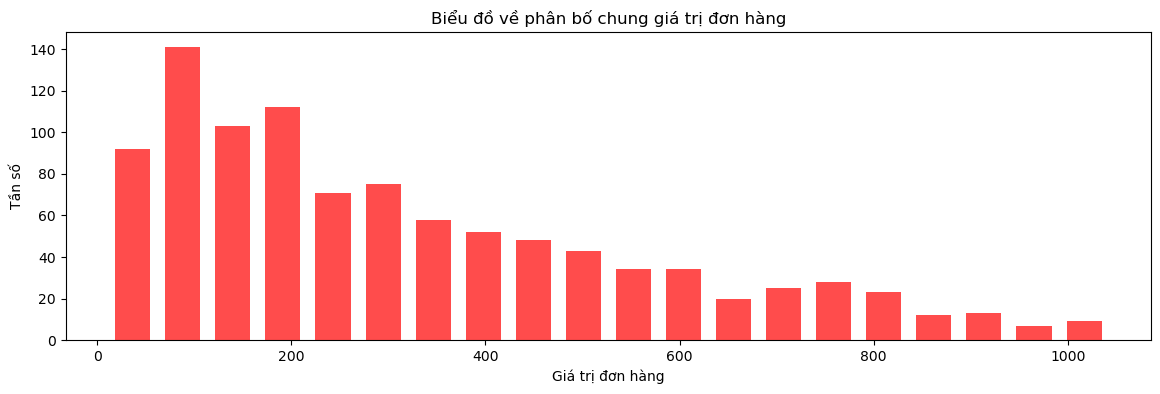

In [45]:
ds_tongGTDH_csv =[float(x) for x in ds_tongGTDH_csv]

fig, ax = plt.subplots(figsize=(14,4))
ax.hist(ds_tongGTDH_csv, 
        bins = 20,
        alpha=0.7,
        rwidth=0.7,
        facecolor='red'
       )
plt.xlabel('Giá trị đơn hàng')
plt.ylabel('Tần số')
plt.title("Biểu đồ về phân bố chung giá trị đơn hàng")
plt.show()

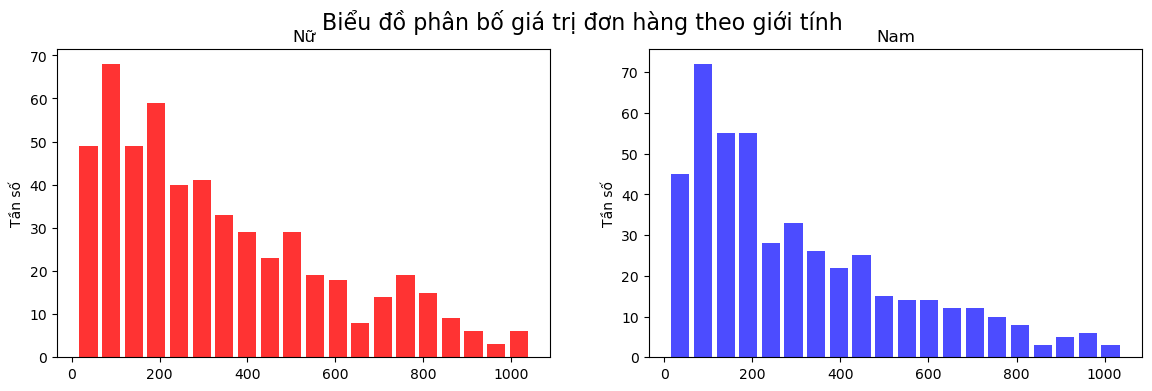

In [9]:
ds_tongGTDH_nu_csv = [float(x) for x in ds_tongGTDH_nu_csv]
ds_tongGTDH_nam_csv = [float(x) for x in ds_tongGTDH_nam_csv]

fig, (ax1, ax2) = plt.subplots(nrows = 1,
                              ncols = 2,
                              figsize=(14,4))

ax1.hist(ds_tongGTDH_nu_csv, bins=20, facecolor='red', alpha=0.8, rwidth=0.8,)
ax1.set_ylabel("Tần số")
ax1.set_title("Nữ")

ax2.hist(ds_tongGTDH_nam_csv, bins=20, facecolor='blue', alpha=0.7, rwidth=0.8,)
ax2.set_ylabel("Tần số")
ax2.set_title("Nam")

fig.suptitle('Biểu đồ phân bố giá trị đơn hàng theo giới tính', fontsize=16)
plt.show()

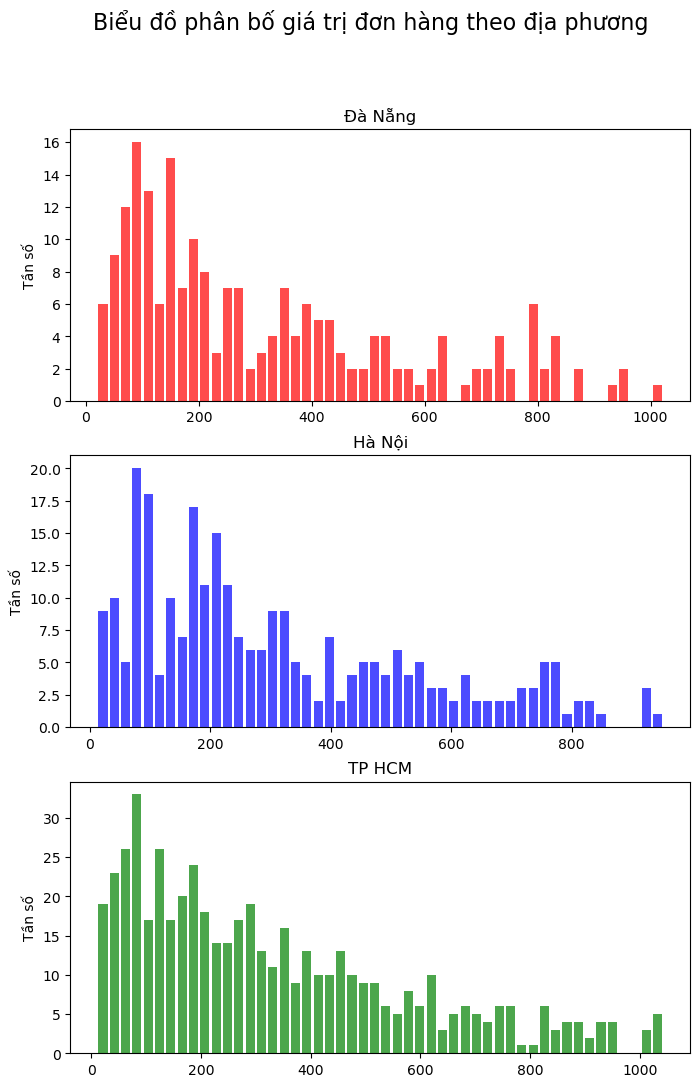

In [10]:
ds_tongGTDH_DN_csv = [float(x) for x in ds_tongGTDH_DN_csv]
ds_tongGTDH_HN_csv = [float(x) for x in ds_tongGTDH_HN_csv]
ds_tongGTDH_HCM_csv = [float(x) for x in ds_tongGTDH_HCM_csv]

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3,
                                    ncols = 1,
                                    figsize=(8,12))

ax1.hist(ds_tongGTDH_DN_csv, bins=50, facecolor='red', alpha=0.7, rwidth=0.8)
ax1.set_ylabel("Tần số")
ax1.set_title("Đà Nẵng")

ax2.hist(ds_tongGTDH_HN_csv, bins=50, facecolor='blue', alpha=0.7, rwidth=0.8)
ax2.set_ylabel("Tần số")
ax2.set_title("Hà Nội")

ax3.hist(ds_tongGTDH_HCM_csv, bins=50, facecolor='g', alpha=0.7, rwidth=0.8)
ax3.set_ylabel("Tần số")
ax3.set_title("TP HCM")

fig.suptitle('Biểu đồ phân bố giá trị đơn hàng theo địa phương', fontsize=16)
plt.show()

### <font color='blue'>Vẽ biểu đồ scatter về mối liên hệ giữa giá trị đơn hàng và rating</font>

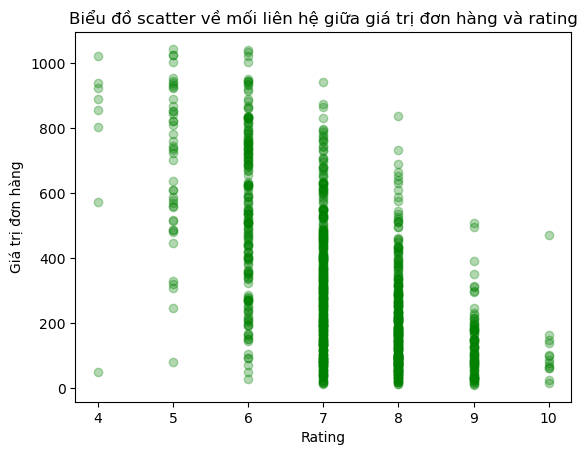

In [32]:
ds_tongGTDH_csv = [float(x) for x in ds_tongGTDH_csv]
ds_rating_csv = [int(x) for x in ds_rating_csv]

plt.scatter(ds_rating_csv, ds_tongGTDH_csv, alpha=0.3, color='g')
plt.xlabel("Rating")
plt.ylabel("Giá trị đơn hàng")
plt.title("Biểu đồ scatter về mối liên hệ giữa giá trị đơn hàng và rating")
plt.show()

### <font color='blue'>Vẽ biểu đồ tree-map cho các mặt hàng ('Product line')</font>

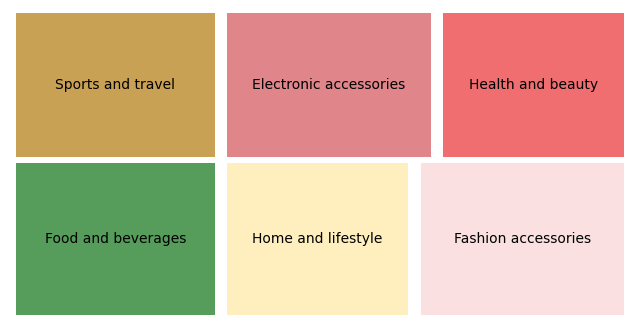

In [41]:
import squarify

ds_sp_thongke = list(set(ds_sp_csv))
ds_tanSo_sp, ds_tanSuat_sp = thongKe(ds_sp_csv, ds_sp_thongke)

color_list = ['#0f7216', '#b2790c', '#ffe9a3',
              '#f9d4d4', '#d35158', '#ea3033']

fig = plt.figure(figsize=(8,4))

squarify.plot(sizes=ds_tanSo_sp, 
              label=ds_sp_thongke,
              color=color_list,
              alpha=0.7,
              pad=True
              )

plt.axis("off")
plt.show()

# Bài 2: rút ra nhận xét cho các biểu đồ trên